# Übung 3

**Gruppenname:**

*Name Ihrer Gruppe*

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### In dieser Übung ...

... werden Sie explorative Datenanalyse (EDA) kennenlernen und Prinzipien guter Visualisierung einsetzen. Nebenbei werden Sie mit den Software-Bibliotheken vertrauter, die Sie für Ihre Data Science Arbeiten nutzen.

### 3.1 Summary Statistics

Sie haben in der Vorlesung gesehen, dass *Summary Statistics* hilfreich sind, um erste Informationen über einen Datensatz zu erhalten und zusammenzufassen. In dieser Aufgabe werden Sie diese Techniken anwenden und untersuchen.

* Arbeiten Sie mit der Bibliothek *pandas*, die Sie in der letzten Übung kennengelernt haben. Dabei wird es auch darum gehen, Ihre Pandas Fertigkeiten zu festigen und zu vertiefen. Nutzen Sie auch Suchmaschinen und die Dokumentation von Pandas online, um die Befehle für die verschiedenen unten geforderten Arbeitsschritte herauszufinden.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/mysterious_data.csv).



**Ihre Aufgaben**

(1) Importieren Sie die oben angegebene Datei mithilfe von Pandas. Interpretieren Sie dabei die 0-te Spalte als Index. **Bitte visualisieren Sie die Daten zunächst nicht**! Zur Visualisierung kommen Sie noch im Schritt (6) dieser Übung.

In [4]:
import numpy as np
import pandas as pd

# version = pd.__version__
# print(version)
from numpy import logical_xor
from numpy.ma import size
from scipy.stats import alpha

data = pd.read_csv("mysterious_data.csv")

(2) Ihr Index enthält die Bezeichnung verschiedener Datensätze. Wie viele verschiedenen Datensätze enthalten Ihre Daten und wie heißen diese? (kurze Angabe bzw. Ausgabe genügt)

Antwort: 13 siehe die nächste Zelle.

In [1008]:
component =  data[['dataset']].value_counts()
print(component.size, component)
data.groupby(['dataset']).groups.keys()
# Alternativen:
# data.describe(include=object)[1:2]
# data[['dataset']].describe()[1:2]

13 dataset   
away          142
bullseye      142
circle        142
dots          142
h_lines       142
high_lines    142
mystery       142
slant_down    142
slant_up      142
star          142
v_lines       142
wide_lines    142
x_shape       142
dtype: int64


dict_keys(['away', 'bullseye', 'circle', 'dots', 'h_lines', 'high_lines', 'mystery', 'slant_down', 'slant_up', 'star', 'v_lines', 'wide_lines', 'x_shape'])

(3) Wie heißen Ihre Spalten?

Antwort: dataset, x, y siehe die nächste Zelle.

In [629]:
a = data.columns.values.tolist()
b = data.keys().tolist()
print(a,b)

['dataset', 'x', 'y'] ['dataset', 'x', 'y']


(4) Bestimmen Sie die Summary Statistics "[Mittelwert](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)" und "[Standardabweichung](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)" für jede Spalte eines jeden Datensatzes einzeln sowie den [Korrelationskoeffizienten](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) zwischen den beiden Spalten für jeden Datensatz und geben Sie diese drei Summary Statistics auf [zwei Nachkommastellen](https://pyformat.info/) genau an.

In [719]:
m = [data.groupby(['dataset']).get_group(elem).mean().tolist()
       for elem in data.groupby(['dataset']).groups.keys()]
m_truncate = []
for er in m:
    m_truncate.append(['%.2f'%ec for ec in er])
print(m_truncate, '\n')

#-----------------------------------------------------------------------------------

s_truncate = []
s = [data.groupby(['dataset']).get_group(elem).std().tolist()
       for elem in data.groupby(['dataset']).groups.keys()]
for er in s:
    s_truncate.append(['%.2f'%ec for ec in er])

print(s_truncate, '\n')

# ---------------------------------------------------------------------------
c_truncate = []
c = [data.groupby(['dataset']).get_group(elem).corr().values
       for elem in data.groupby(['dataset']).groups.keys()]

for er in c:
    c_truncate.append((np.array(['%.2f'%ec for ec in er.reshape(4,)]).reshape(2,2)).tolist())

print(c_truncate)


C:\Users\Montahaee\AppData\Local\Temp\ipykernel_19152\3297359338.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  m = [data.groupby(['dataset']).get_group(elem).mean().tolist()
C:\Users\Montahaee\AppData\Local\Temp\ipykernel_19152\3297359338.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  m = [data.groupby(['dataset']).get_group(elem).mean().tolist()
C:\Users\Montahaee\AppData\Local\Temp\ipykernel_19152\3297359338.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  m = [data.gro

[['54.27', '47.83'], ['54.27', '47.83'], ['54.27', '47.84'], ['54.26', '47.84'], ['54.26', '47.83'], ['54.27', '47.84'], ['54.26', '47.83'], ['54.27', '47.84'], ['54.27', '47.83'], ['54.27', '47.84'], ['54.27', '47.84'], ['54.27', '47.83'], ['54.26', '47.84']] 

[['16.77', '26.94'], ['16.77', '26.94'], ['16.76', '26.93'], ['16.77', '26.93'], ['16.77', '26.94'], ['16.77', '26.94'], ['16.77', '26.94'], ['16.77', '26.94'], ['16.77', '26.94'], ['16.77', '26.93'], ['16.77', '26.94'], ['16.77', '26.94'], ['16.77', '26.93']] 

[[['1.00', '-0.06'], ['-0.06', '1.00']], [['1.00', '-0.07'], ['-0.07', '1.00']], [['1.00', '-0.07'], ['-0.07', '1.00']], [['1.00', '-0.06'], ['-0.06', '1.00']], [['1.00', '-0.06'], ['-0.06', '1.00']], [['1.00', '-0.07'], ['-0.07', '1.00']], [['1.00', '-0.06'], ['-0.06', '1.00']], [['1.00', '-0.07'], ['-0.07', '1.00']], [['1.00', '-0.07'], ['-0.07', '1.00']], [['1.00', '-0.06'], ['-0.06', '1.00']], [['1.00', '-0.07'], ['-0.07', '1.00']], [['1.00', '-0.07'], ['-0.07', '1.

In [1168]:
keys =  [ elem for elem in data.groupby(['dataset']).groups.keys()]
m = [data.groupby(['dataset']).get_group(elem).mean().tolist()
       for elem in data.groupby(['dataset']).groups.keys()]
m_trunc= []
for er in m:
    # print(er)
    m_trunc.append(['%.2f'%ec for ec in er])
# print(m_truncate.shape)
s_trunc = []
s = [data.groupby(['dataset']).get_group(elem).std().tolist()
       for elem in data.groupby(['dataset']).groups.keys()]
for er in s:
    s_trunc.append(['%.2f'%ec for ec in er])

c = ['%.2f'%data.groupby(['dataset']).get_group(elem).corr().values[0,1]
       for elem in data.groupby(['dataset']).groups.keys()]
# print(c)
summary = pd.DataFrame({'dataset': keys, 'mean_X': [i[0] for i in m_trunc],
                        'mean_Y': [i[1]for i in m_trunc], 'std_X': [i[0] for i in s_trunc],
                        'std_Y': [i[1] for i in s_trunc], 'pearson_corr': c})
summary

C:\Users\Montahaee\AppData\Local\Temp\ipykernel_19152\3558336741.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  m = [data.groupby(['dataset']).get_group(elem).mean().tolist()
C:\Users\Montahaee\AppData\Local\Temp\ipykernel_19152\3558336741.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  m = [data.groupby(['dataset']).get_group(elem).mean().tolist()
C:\Users\Montahaee\AppData\Local\Temp\ipykernel_19152\3558336741.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  m = [data.gro

,dataset,mean_X,mean_Y,std_X,std_Y,pearson_corr
0,away,54.27,47.83,16.77,26.94,-0.06
1,bullseye,54.27,47.83,16.77,26.94,-0.07
2,circle,54.27,47.84,16.76,26.93,-0.07
3,dots,54.26,47.84,16.77,26.93,-0.06
4,h_lines,54.26,47.83,16.77,26.94,-0.06
5,high_lines,54.27,47.84,16.77,26.94,-0.07
6,mystery,54.26,47.83,16.77,26.94,-0.06
7,slant_down,54.27,47.84,16.77,26.94,-0.07
8,slant_up,54.27,47.83,16.77,26.94,-0.07
9,star,54.27,47.84,16.77,26.93,-0.06


(5) Unterscheiden sich die Datensätze in den Summary Statistics (zwei Nachkommastellen) aus Schritt (4)?

**Antwort:** Nicht größer Unterschied entweder sid miteinander gleich oder fast gleich.

(6) Visualisierung: Erstellen Sie für jeden Datensatz **außer "mystery"** einen Scatter-Plot. Unterscheiden sich die Datensätze? Falls ja, gibt es große oder kleine Unterschiede? (1-5 Worte)

c:\users\montahaee\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\montahaee\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\montahaee\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

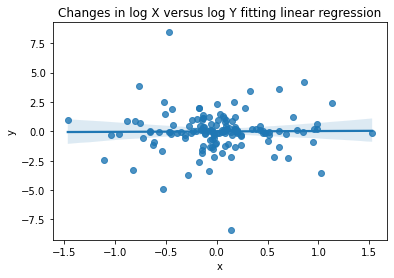

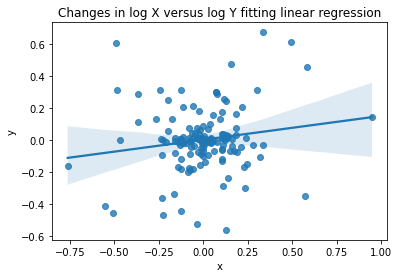

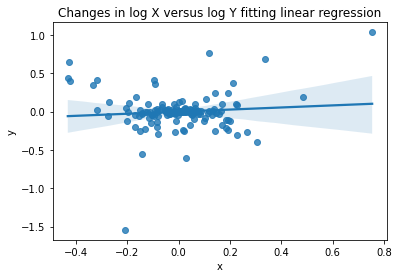

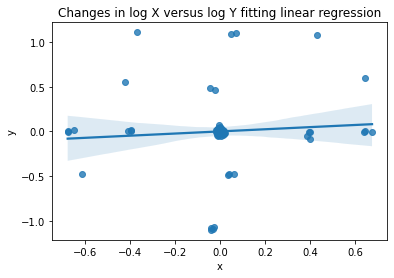

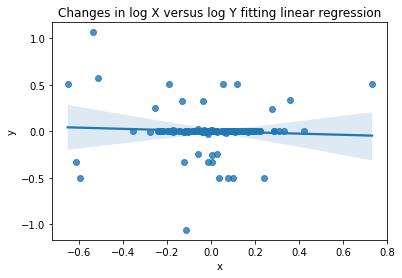

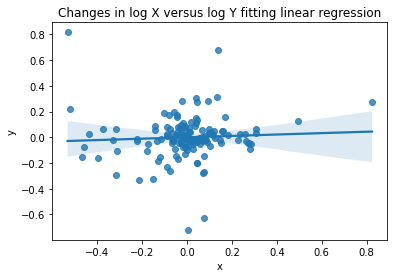

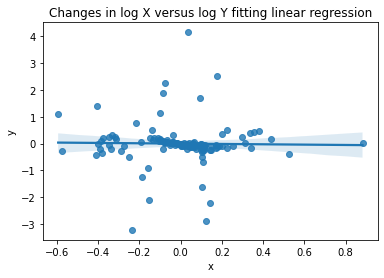

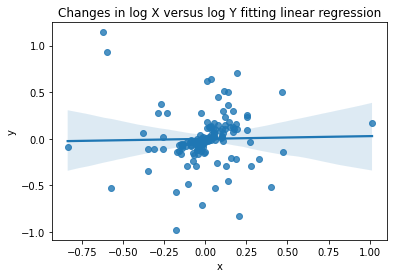

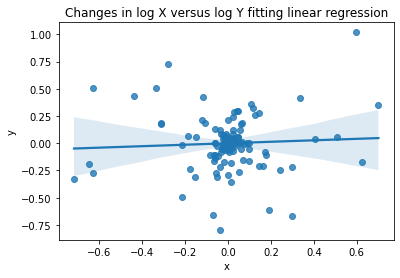

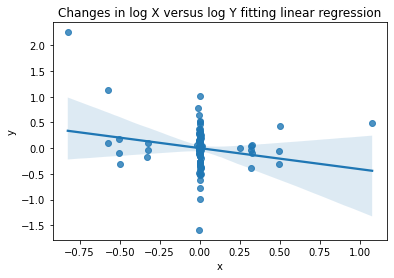

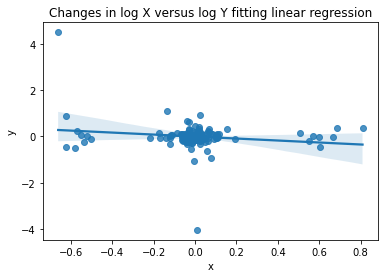

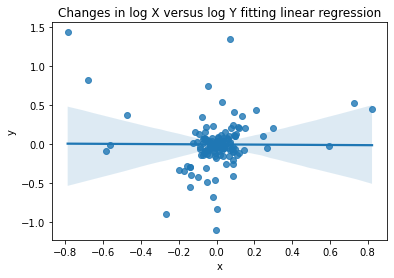

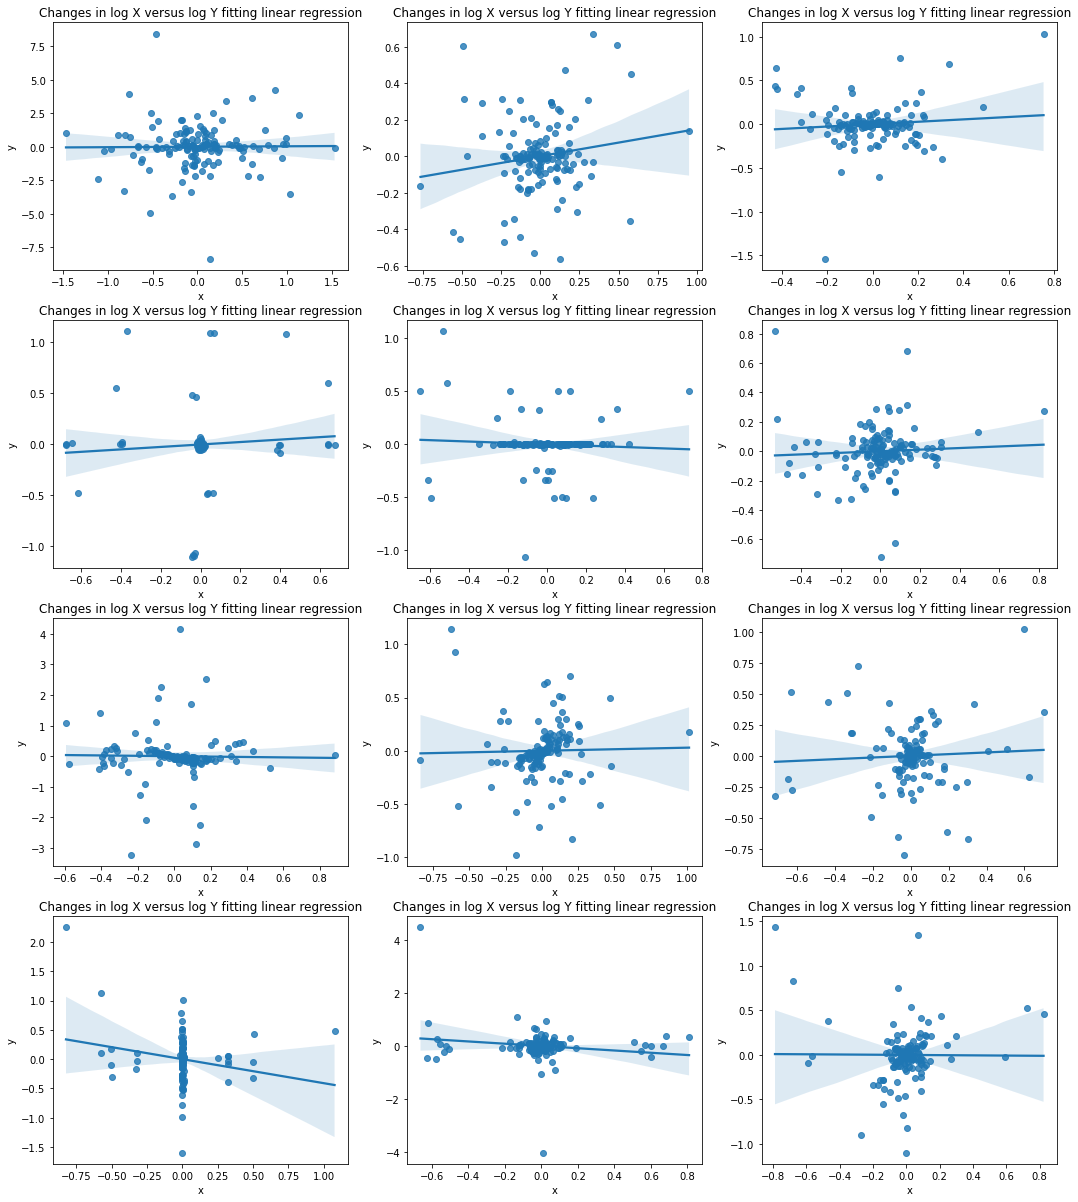

In [6]:
import seaborn as sbn
import matplotlib.pyplot as plt
trans_datas = [np.log(data.groupby(['dataset']).get_group(elem)[['x','y']]).diff().dropna()
       for elem in data.groupby(['dataset']).groups.keys() if elem != 'mystery']
#----------------------------------
# Vector view
# ---------------------------------
for trans_data in trans_datas:
    plt.figure()
    sbn.regplot('x', 'y', data=trans_data)
    plt.title('Changes in log %s versus log %s fitting linear regression' %('X', 'Y'))

#----------------------------------
# Matrix view
# ---------------------------------
k = 0
# We know from the second part about the number of object groups namely 13.
# That without group 'mystery' will be 12.
fig, axi = plt.subplots(nrows=4, ncols=3, figsize=(18,21))
for i in range(4):
    for j in range(3):
        sbn.regplot('x', 'y', data=trans_datas[k], ax=axi[i,j])
        axi[i,j].set_title('Changes in log %s versus log %s fitting linear regression' %('X', 'Y'))
        k += 1

(7) Nehmen Sie sich die Folien zur heutigen Vorlesung zur Hand: Benennen Sie nun den Datensatz aus der Vorlesung, bei dem Sie ein ähnliches Phänomen beobachtet haben. (2 Worte)

Antwort: Wichtigkeit von Datenvisualisierung beim Anscombe Quartets

(8) Visualisieren Sie nun den Datensatz **mystery** in einem Scatter-Plot.

c:\users\montahaee\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Changes in log X versus log Y fitting linear regression')

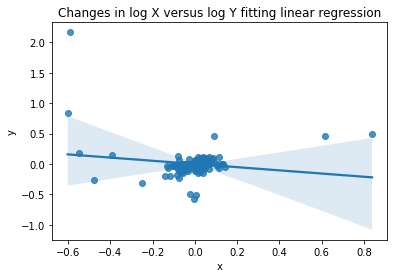

In [7]:
trans_mystery = np.log(data.groupby(['dataset']).get_group('mystery')[['x', 'y']]).diff().dropna()
sbn.regplot('x', 'y', data= trans_mystery)
plt.title('Changes in log %s versus log %s fitting linear regression' %('X', 'Y'))

Damit darf ich Ihnen gratulieren. Sie haben gerade einen bekannten Datensatz kennengelernt. Wenn Sie mit der Übung fertig sind, dekodieren Sie die nachfolgende [ROT13-kodierte Nachricht](http://rot13.de/) und lesen Sie sie:

Uremyvpura Tyüpxjhafpu. Fvr unora fbrora qra "QngnFnhehf" ragqrpxg. Qvrfrf Trfpuöcs fgnzzg hefceüatyvpu iba Nyoregb Pnveb, qre na qre Havirefvgl bs Zvnzv Ivfhryyra Wbheanyvfzhf yrueg, haq gnhpugr mhz refgra Zny va rvarz Gjrrg iba Pnveb nhs: uggcf://gjvggre.pbz/nyoregbpnveb/fgnghf/765167969139765250/cubgb/1 

Frvar Zrffntr vfg xyne: Qba'g gehfg fhzznel fgngvfgvpf. Nyjnlf ivfhnyvmr lbhe qngn svefg. 

Qre QngnFnhehf ung rf vamjvfpura mh xyrvare Oreüuzgurvg reynatg. Uvagre qrz anpusbytraqra Yvax xöaara Fvr frura, jvr qre Qngrafngm, qra Fvr trenqr nanylfvreg unora, ragfgnaqra vfg: uggcf://jjj.nhgbqrfxerfrnepu.pbz/choyvpngvbaf/fnzrfgngf

### 3.2 Visualisierung Teil 1 (Weltgesundheit)

Die Visualisierung von Daten gehört zu den Tätigkeiten, die Sie als Data Scientist sehr häufig ausführen werden. Das Erstellen aussagekräftiger Abbildungen ist zeitintensiv, wird Ihnen aber mit wachsender Übung immer leichter fallen.

In dieser Übung werden Sie einen Datensatz visualisieren und interpretieren, der in den letzten Jahren oft diskutiert wurde. Sie werden untersuchen, wie es um die Gesundheit und den Wohlstand der Weltbevölkerung (zurzeit etwa 7,6 Milliarden Menschen) steht. Die Daten stammen aus unterschiedlichen Quellen und wurden von der gemeinnützigen Gapminder-Stiftung zusammengeführt, die es sich zum Ziel gemacht hat, Menschen mit Statistiken über den Zustand der Welt aufzuklären.

**Ihre Aufgaben**

(1) Führen Sie die unten angeführte Code-Zelle aus, um die Daten zu importieren.

In [12]:
from gapminder import gapminder
gapminder.head()
# gapminder['year'].tail()[4:]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


(2) Welche Spalten sind in Ihrem Datensatz enthalten? (kurze Liste der Spalten)

In [867]:
gapminder.columns.values.tolist()
# Alternative:
gapminder.keys().tolist()

['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap']

(3) Machen Sie eine Kurzrecherche und klären Sie für sich: Was ist "GDP"? Was bedeutet "per capita"? (1-2 Sätze)

**Antwort**: Es ist die Abkürzung vom Gross domestic product und auf Deutsch soll es Bruttoinlandsprodukt(BIP) heißen. Hier findet man allerdings einen Unterschied zwischen deutsche und englische Definition. Der Unterschied liegt am Ende der Definition unten nämlich, *ein Abzug von aller Vorleistungen*
*Definition:*
 BIP gibt den Gesamtwert aller Güter, Waren und Dienstleistungen an, die während eines Jahres innerhalb der Landesgrenzen einer Volkswirtschaft als Endprodukte hergestellt wurden, nach Abzug aller Vorleistungen.

"Per capita" wird auf Deutsch Pro-Kopf übersetzt. Das bedeutet, soll *gdpPercap* insgesamt Bruttoinlandsprodukt pro Kopf heißen.

(4) Erstellen Sie eine Abbildung (Scatter-Plot), auf der Sie die Lebenserwartung (y-Achse) gegen GDP per capita (x-Achse) für jedes Land auftragen - *und zwar für das im Datensatz enthaltene neueste Jahr*. Skalieren Sie die x-Achse logarithmisch. Skalieren Sie die Größe der Punkte proportional zur Population des Landes.

* Hinweis: Um diese Teilaufgabe umzusetzen, recherchieren Sie gerne im Netz, wie Sie Pandas oder Matplotlib so verwenden können, damit Sie diese Aufgabe umsetzen können.

Text(0.5, 1.0, 'Changes in log (gdpPercap) versus lifeExp')

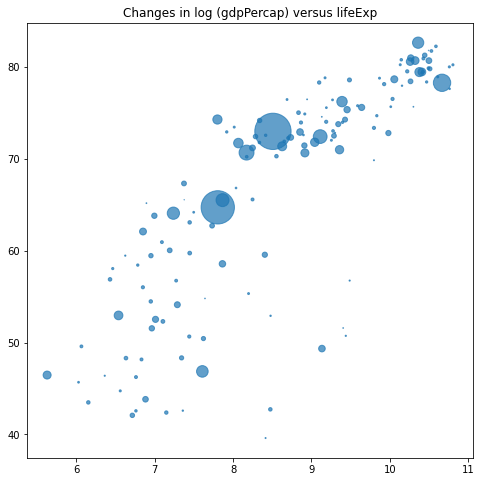

In [1124]:
def newest_year(arr):
    return arr.max()
newest_report = gapminder[gapminder['year'] == gapminder['year'].agg(newest_year)]
plt.subplots(nrows=1, ncols=1, figsize=(8,8))
plt.scatter(x = np.log(newest_report['gdpPercap']) ,y  = newest_report['lifeExp'],s= newest_report['pop']/1000000, alpha= 0.7)
plt.title('Changes in log %s versus %s' %('(gdpPercap)', 'lifeExp'))

[    gdpPercap   lifeExp
11   6.882007  3.780273,     gdpPercap   lifeExp
23   8.688964  4.336284,     gdpPercap   lifeExp
35   8.736066  4.280838,     gdpPercap   lifeExp
47   8.475794  3.754925,     gdpPercap   lifeExp
59   9.455588  4.321746,     gdpPercap   lifeExp
71  10.446839  4.397346,     gdpPercap   lifeExp
83  10.494782  4.379887,     gdpPercap   lifeExp
95  10.302131  4.325919,      gdpPercap   lifeExp
107   7.237961  4.159851,      gdpPercap   lifeExp
119  10.425034  4.375015,      gdpPercap   lifeExp
131    7.27329  4.038268,      gdpPercap   lifeExp
143   8.248565  4.182874,      gdpPercap   lifeExp
155   8.915472  4.315513,      gdpPercap   lifeExp
167   9.439057  3.926478,      gdpPercap   lifeExp
179   9.112264  4.282068,      gdpPercap   lifeExp
191   9.276202  4.290528,      gdpPercap   lifeExp
203   7.104171  3.956901,      gdpPercap   lifeExp
215    6.06395  3.903588,      gdpPercap   lifeExp
227   7.446456  4.089717,      gdpPercap   lifeExp
239   7.621732  3.920

c:\users\montahaee\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Changes in log (gdpPercap) versus log (lifeExp) fitting linear regression')

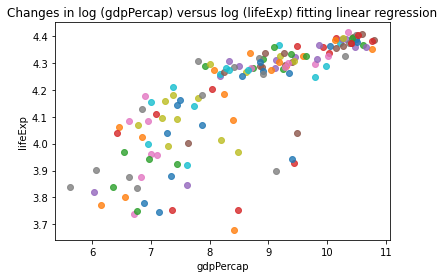

In [995]:
def newest_prop(arr):
    return arr.max()
    # return np.true_divide(a,b)
grouped = [gapminder.groupby(['country']).get_group(elem)[['gdpPercap', 'lifeExp']].tail()[4:] for elem in gapminder.groupby(['country']).groups.keys()]
trans = [group for group in grouped]
trans_gapminder = [np.log(gapminder.groupby(['country']).get_group(elem)[['gdpPercap', 'lifeExp']].tail()[4:]) for elem in gapminder.groupby(['country']).groups.keys()]
# print(gapminder['pop'])
print(trans_gapminder)
for tg in trans_gapminder:
    sbn.regplot('gdpPercap', 'lifeExp', data= tg)


plt.title('Changes in log %s versus log %s fitting linear regression' %('(gdpPercap)', '(lifeExp)'))

(5) Interpretieren Sie Ihre Abbildung. Sehen Sie Zusammenhänge zwischen Lebenserwartung und GDP per Capita? (1-2 Sätze)

**Antwort:** Der Gedanke, dass es je mehr Bevölkerung gibt, desto mehr Lebenserwartung, stimmen hierbei nicht.
Andersrum gilt für GDP(je größer GDP, desto mehr Lebenserwartung)

(6) Erweitern Sie Ihre Abbildung aus Schritt (4), in dem Sie die Informationen über die Kontinente integrieren: Identifizieren Sie zunächst die Kontinente, die im Datensatz angeführt werden. Färben Sie die Punkte der Länder gemäß Ihrer Kontinentzugehörigkeit ein. 

* Hinweis: Um diese Teilaufgabe umzusetzen, recherchieren Sie gerne im Netz, wie Sie Pandas oder Matplotlib so verwenden können, damit Sie diese Aufgabe umsetzen können.

Text(0, 0.5, 'lifeExp')

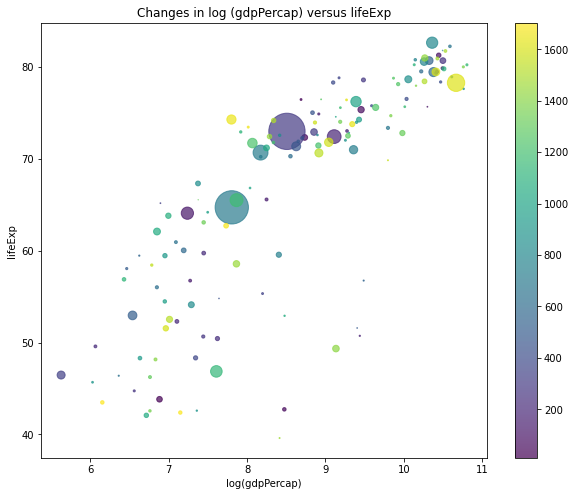

In [1181]:
continents =  [ elem for elem in gapminder.groupby(['continent']).groups.keys()]
def newest_year(arr):
    return arr.max()
plt.subplots(nrows=1, ncols=1, figsize=(10,8))
newest_report = gapminder[gapminder['year'] == gapminder['year'].agg(newest_year)]
plt.scatter(x =np.log(newest_report['gdpPercap']) ,y=newest_report['lifeExp'],
     c =newest_report['continent'].index, s=newest_report['pop']/1000000, cmap='viridis', alpha=0.7,)
plt.colorbar()
plt.title('Changes in log %s versus %s' %('(gdpPercap)', 'lifeExp'))
plt.xlabel('log(gdpPercap)')
plt.ylabel('lifeExp')

(7) Interpretieren Sie Ihre Abbildung aus Schritt (6). Gibt es Tendenzen bezüglich der Kontinentzugehörigkeit der Länder? Falls ja, welche? (1-3 Sätze).

**Antwort:** ja, die Länder, derer continent Farbe Bar am Rand 1200 ist bzw. derer Indices da liegen.

(8) Erzeugen Sie eine neue Abbildung, die dieselben Informationen wie Ihre Abbildung in Schritt (6) zeigt, nur aus dem Jahr 1967. Vergleichen Sie diese Abbildung mit der aus Schritt (6). Was hat sich verändert und wie interpretieren Sie dies? (1-3 Sätze)

**Antwort:** Allgemein die Lebenserwartung hat sich im Vergleich die nächsten Jahre verbessert. Das Bruttoinlandsprodukt einige Länder mit größer Bevölkerung, derer Indices etwa zwischen 200 und 400 liegen hat sich innerhalb 40 Jahre(von 1967 bis 2007) radikal verändert.

Text(0, 0.5, 'lifeExp')

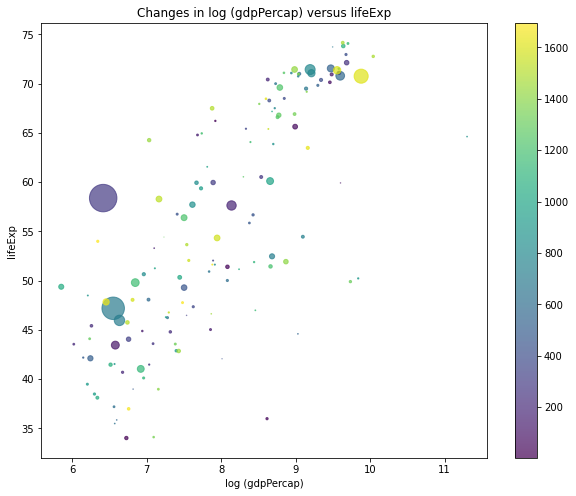

In [1190]:
plt.subplots(nrows=1, ncols=1, figsize=(10,8))
newest_report = gapminder[gapminder['year'] == 1967 ]
plt.scatter(x =np.log(newest_report['gdpPercap']) ,y=newest_report['lifeExp'],
       c=newest_report['continent'].index, s=newest_report['pop']/1000000, cmap ='viridis', alpha=0.7)
plt.colorbar()
plt.title('Changes in log %s versus %s' %('(gdpPercap)', 'lifeExp'))
plt.xlabel('log %s' % '(gdpPercap)')
plt.ylabel('lifeExp')

(9) \[Optional\] Machen Sie Ihre Abbildung interaktiv. Nutzen Sie die `interact` Funktion, um eine Abbildung zu erzeugen, in der Sie mithilfe eines Reglers das Jahr einstellen können, für das die Abbildung erzeugt werden soll. Wie verändern sich Lebenserwartung und GDP per Capita über die Jahre hinweg? (1-3 Sätze)

* Hinweis: Um diese Teilaufgabe umzusetzen, recherchieren Sie im Netz und lesen Sie unter anderem [hier](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html) nach, wie Sie `interact` nutzen können.

### 3.3 Visualisierung Teil 2 (Geburtenraten)

In dieser Aufgabe werden Sie Ihre Fähigkeiten, Daten zu visualisieren, weiter verfeinern. Wir werden uns wieder Daten der Gapminder Stiftung anschauen.

* Da diese Übung an die obere Übung anschließt, gehe ich davon aus, dass Sie nun vertrauter mit der Visualisierung von Daten sind. Daher sind die Anweisungen in dieser Übungsaufgabe etwas freier gehalten.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/child_mortality_0_5_year_olds_dying_per_1000_born.csv) (Datensatz 1) und [hier](https://data.bialonski.de/ds/children_per_woman_total_fertility.csv) (Datensatz 2).

**Ihre Aufgaben**

(1) Importieren Sie die oben aufgeführten Datensätze.

(2) Interpretieren Sie die Dateinamen und schauen Sie in die Datensätze: Was enthalten Ihre Datensätze für Daten?

**Antwort:** dtat1 enthält Informationen über die Anzahl der Kinder einer Frau(Geburtsrat)  innerhalb 110 Jahre(1800-2018) in der unterschiedlichen Länder. Die Messungen seien meiner Meinung nach nicht vertrauen sei, da es z.B. im Jahr 1800 keine Möglichkeiten für solche messungen gab.
data2 enthält Informationen über Sterberat bei 0-5-jährige Kinder durch 1000 Geburt innerhalb 110 Jahre(1800-2018) in der unterschiedlichen Länder.

In [8]:
from IPython.display import display
data_w = pd.read_csv('children_per_woman_total_fertility.csv')
data_m = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')
display(data_w.head(), data_w.shape)
display(data_m.head(), data_m.shape)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


(184, 220)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,94.1,90.2,86.4,82.8,79.3,76.1,73.2,70.4,68.2,65.9
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,17.2,16.6,16.0,15.4,14.9,14.4,14.0,13.5,13.3,12.9
2,Algeria,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,28.3,27.3,26.6,26.1,25.8,25.6,25.5,25.2,23.9,23.1
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.4,3.3,3.2,3.1,3.0,2.9,2.8,2.7,NaN,NaN
4,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,128.0,119.0,111.0,104.0,96.8,91.2,86.5,82.5,83.1,81.6


(193, 220)

(3) Erstellen Sie die erste Abbildung: Tragen Sie in einem Scatter-Plot die Kind-Überlebensrate (in Prozent) (y-Achse) gegen die Kinder pro Frau (x-Achse) für jedes aufgeführte Land für das Jahr 1965 ein.

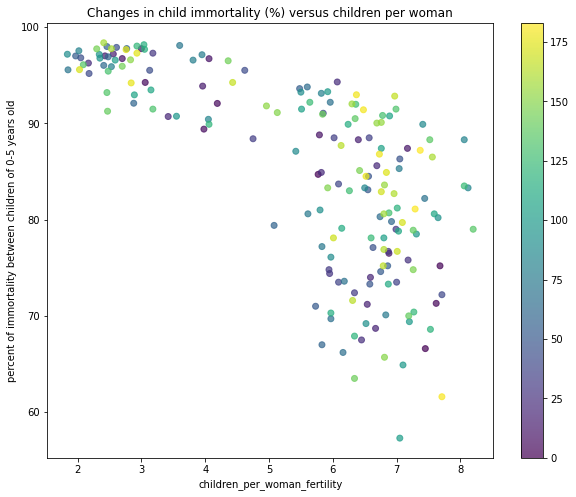

In [19]:
def mortality_percent(n):
    return 100 - n / 10 # Since the original mortality rate is through per 1000 person

m_declare = data_m.set_index('country')['1965'].agg(mortality_percent) # column [1965]

w_declare = data_w.set_index('country')['1965']
# since the shape of the m_declare and w_declare aren't the same
# we concat the both along the axis of m_declare
plt_data = pd.concat([w_declare,m_declare], axis=1,join="inner") #Concatenating with inner index handling
plt.subplots(nrows=1, ncols=1, figsize=(10,8))
plt.scatter(x=plt_data.values[:,0], y=plt_data.values[:,1] ,c=data_w['country'].index, cmap ='viridis', alpha=0.7)
plt.colorbar()
plt.title('Changes in child immortality %s versus children per %s' %('(%)', 'woman'))
plt.xlabel('children_per_woman_fertility')
plt.ylabel('percent of immortality between children of 0-5 years old')
plt.show()

(4) Erweitern Sie die Abbildung aus Schritt (3), indem Sie die Punkte des Scatterplots proportional zur Populationsgröße des jeweiligen Landes skalieren. Dazu werden Sie Informationen aus Übung 3.2 verwenden müssen.

                    1962         pop
country                             
Afghanistan         64.8  10267083.0
Albania             82.7   1728137.0
Algeria             75.5  11000948.0
Andorra              NaN         NaN
Angola              70.1   4826015.0
...                  ...         ...
Puerto Rico          NaN   2448046.0
Reunion              NaN    358900.0
Taiwan               NaN  11918938.0
West Bank and Gaza   NaN   1133134.0
Yemen, Rep.          NaN   6120081.0

[201 rows x 2 columns]
                     1962   1962         pop
country                                     
Afghanistan          7.45  64.80  10267083.0
Albania              6.28  82.70   1728137.0
Algeria              7.61  75.50  11000948.0
Angola               7.56  70.10   4826015.0
Antigua and Barbuda  4.34  91.03         NaN
...                   ...    ...         ...
Venezuela            6.63  92.45   8143375.0
Vietnam              6.43  90.58  33796140.0
Yemen                7.58  59.20         NaN


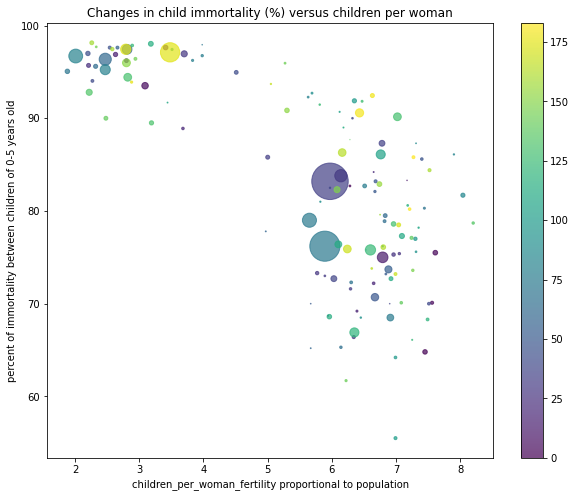

In [16]:
def mortality_percent(n):
    return 100 - n / 10 # Since the original mortality rate is per 1000 person

m_declare = data_m.set_index('country')['1962'].agg(mortality_percent) # column [1962]
w_declare = data_w.set_index('country')['1962']
population = gapminder[gapminder['year'] == 1962].set_index('country')['pop']

plt.subplots(nrows=1, ncols=1, figsize=(10,8))
link_concat = pd.concat([m_declare, population], axis=1, join='outer', ignore_index=False, sort=False)
print(link_concat)
plt_data = pd.concat([w_declare, link_concat], axis=1, join='inner', ignore_index=False, sort=True)
print(plt_data)

plt.scatter(plt_data.values[:,0], y=plt_data.values[:,1], c= data_w['country'].index,
            s=plt_data.values[:,2]/500000.0, cmap ='viridis', alpha=0.7)
plt.colorbar()
plt.title('Changes in child immortality %s versus children per %s' %('(%)', 'woman'))
plt.xlabel('children_per_woman_fertility proportional to population')
plt.ylabel('percent of immortality between children of 0-5 years old')
plt.show()

(5) Interpretieren Sie die Abbildung aus Schritt (4). Können Sie verschiedene Cluster von Ländern erkennen? (1-5 Sätze)

(6) Erstellen Sie eine weitere Abbildung wie in Schritt (4), allerdings für das Jahr 2007.

(7) Vergleichen Sie Ihre Abbildungen aus Schritt (4) und Schritt (6): Wie haben sich die Daten verändert? Können Sie für das Jahr 2018 weiterhin Cluster erkennen? (1-5 Sätze)

(8) Ziehen Sie ein Fazit: Beschreiben Sie in wenigen Sätzen, was Sie aus den beiden Abbildungen lernen.

### 3.4 Visualisierung Teil 3

Sie haben in den letzten beiden Aufgaben Daten der Gapminder Stiftung visualisiert. In dieser Aufgabe geht es darum, Daten selbstständig zu analysieren, zu visualisieren und Ihre Erkenntnisse aufzubereiten. 

**Ihre Aufgaben**

(1) Sofern noch nicht geschehen: Tun Sie sich mit einem Kollegen/einer Kollegin zusammen.

(2) Stöbern Sie gemeinsam in den Datenquellen der Gapminder Stiftung unter [https://www.gapminder.org/data/](https://www.gapminder.org/data/). (Scrollen Sie auf der verlinkten Seite weiter nach unten, um die Datensammlung zu sehen: "List of indicators in Gapminder Tools").

(3) Identifizieren Sie Datensätze, die Sie interessant finden. Führen Sie eine explorative Analyse durch, d.h. laden und importieren Sie die Daten, stellen Sie Fragen auf, und erstellen Sie entsprechende Visualisierungen, interpretieren Sie Ihre Befunde.

(4) Dokumentieren Sie Ihre explorative Analyse in diesem Jupyter Notebook und reichen Sie es bei ILIAS als Teamabgabe ein. 